In [30]:
import seaborn as sns
from pydataset import data
import pandas as pd
from pandas import DataFrame
import acquire1
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [31]:


######################################################## PREPARE

In [32]:
#Use the function defined in acquire.py to load the iris data.

In [33]:
def new_iris_data():
    '''
    This function reads the iris data from the Codeup db into a df.
    '''
    sql_query = """
                SELECT 
                    species_id,
                    species_name,
                    sepal_length,
                    sepal_width,
                    petal_length,
                    petal_width
                FROM measurements
                JOIN species USING(species_id)
                """
    
    # Read in DataFrame from Codeup db.
    df = pd.read_sql(sql_query, get_connection('iris_db'))
    
    return df


def get_iris_data():
    '''
    This function reads in iris data from Codeup database, writes data to
    a csv file if a local file does not exist, and returns a df.
    '''
    if os.path.isfile('iris_df.csv'):
        
        # If csv file exists read in data from csv file.
        df = pd.read_csv('iris_df.csv', index_col=0)
        
    else:
        
        # Read fresh data from db into a DataFrame
        df = new_iris_data()
        
        # Cache data
        df.to_csv('iris_df.csv')
        
    return df

In [34]:
df= acquire1.get_iris_data()

In [35]:
df

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2
5,1,setosa,5.4,3.9,1.7,0.4
6,1,setosa,4.6,3.4,1.4,0.3
7,1,setosa,5.0,3.4,1.5,0.2
8,1,setosa,4.4,2.9,1.4,0.2
9,1,setosa,4.9,3.1,1.5,0.1


In [36]:
#Drop the species_id and (this one wasn't there to drop)measurement_id columns.
df = df.drop(columns = ['species_id'])

In [37]:
df

,species_name,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2
5,setosa,5.4,3.9,1.7,0.4
6,setosa,4.6,3.4,1.4,0.3
7,setosa,5.0,3.4,1.5,0.2
8,setosa,4.4,2.9,1.4,0.2
9,setosa,4.9,3.1,1.5,0.1


In [38]:
#Rename the species_name column to just species.
df.rename(columns={'species_name': 'species'}, inplace=True)


In [39]:
df

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2
5,setosa,5.4,3.9,1.7,0.4
6,setosa,4.6,3.4,1.4,0.3
7,setosa,5.0,3.4,1.5,0.2
8,setosa,4.4,2.9,1.4,0.2
9,setosa,4.9,3.1,1.5,0.1


In [40]:
#Create dummy variables of the species name.
# use pd.get_dummies. Returns a dataframe
df_dummy = pd.get_dummies(df[['species']]) #drop_first=[True] if I want to whittle down columns to only the necessary

df_dummy.head()

,species_setosa,species_versicolor,species_virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [41]:
df= pd.concat([df, df_dummy], axis = 1)
df.head()

,species,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
0,setosa,5.1,3.5,1.4,0.2,1,0,0
1,setosa,4.9,3.0,1.4,0.2,1,0,0
2,setosa,4.7,3.2,1.3,0.2,1,0,0
3,setosa,4.6,3.1,1.5,0.2,1,0,0
4,setosa,5.0,3.6,1.4,0.2,1,0,0


In [42]:
#Create a function named prep_iris that accepts the untransformed iris data, and returns 
#the data with the transformations above applied.
def prep_iris(iris_db):
    df= acquire1.get_iris_data()
    df = df.drop(columns = ['species_id'])    
    df.rename(columns={'species_name': 'species'}, inplace=True)    
    df_dummy = pd.get_dummies(df[['species']])
    df= pd.concat([df, df_dummy], axis = 1)  
    return df

In [43]:
########################### PRACTICE

In [44]:
df.head()

,species,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
0,setosa,5.1,3.5,1.4,0.2,1,0,0
1,setosa,4.9,3.0,1.4,0.2,1,0,0
2,setosa,4.7,3.2,1.3,0.2,1,0,0
3,setosa,4.6,3.1,1.5,0.2,1,0,0
4,setosa,5.0,3.6,1.4,0.2,1,0,0


In [45]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,0.333333,0.333333,0.333333
std,0.828066,0.435866,1.765298,0.762238,0.472984,0.472984,0.472984
min,4.300000,2.000000,1.000000,0.100000,0.000000,0.000000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000,0.000000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,0.000000,0.000000,0.000000
75%,6.400000,3.300000,5.100000,1.800000,1.000000,1.000000,1.000000
max,7.900000,4.400000,6.900000,2.500000,1.000000,1.000000,1.000000


In [46]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   species             150 non-null    object 
 1   sepal_length        150 non-null    float64
 2   sepal_width         150 non-null    float64
 3   petal_length        150 non-null    float64
 4   petal_width         150 non-null    float64
 5   species_setosa      150 non-null    uint8  
 6   species_versicolor  150 non-null    uint8  
 7   species_virginica   150 non-null    uint8  
dtypes: float64(4), object(1), uint8(3)
memory usage: 7.5+ KB


In [47]:
df.isnull()

,species,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False


In [48]:
df.value_counts().T

species     sepal_length  sepal_width  petal_length  petal_width  species_setosa  species_versicolor  species_virginica
virginica   5.8           2.7          5.1           1.9          0               0                   1                    2
versicolor  6.7           3.0          5.0           1.7          0               1                   0                    1
                          3.1          4.7           1.5          0               1                   0                    1
            6.8           2.8          4.8           1.4          0               1                   0                    1
            6.9           3.1          4.9           1.5          0               1                   0                    1
            7.0           3.2          4.7           1.4          0               1                   0                    1
virginica   4.9           2.5          4.5           1.7          0               0                   1                    1
     

In [49]:
df.shape

(150, 8)

(array([[ 50.,  50.,  50.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,  11.,  48.,  49.,  31.,  11.],
        [  0.,   0.,   8.,  86.,  52.,   4.,   0.,   0.,   0.,   0.],
        [  0.,  37.,  13.,   1.,  10.,  34.,  30.,  20.,   5.,   0.],
        [ 50.,  48.,  46.,   6.,   0.,   0.,   0.,   0.,   0.,   0.],
        [100.,  50.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [100.,  50.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [100.,  50.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]]),
 array([0.0, 0.79, 1.58, 2.37, 3.16, 3.95, 4.74, 5.53, 6.32, 7.11, 7.9],
       dtype=object),
 <a list of 8 BarContainer objects>)

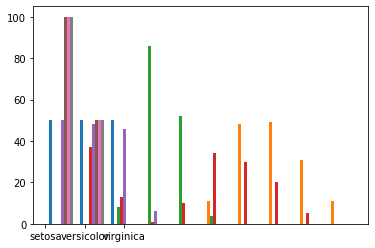

In [50]:
plt.hist(df)

TypeError: ufunc 'true_divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

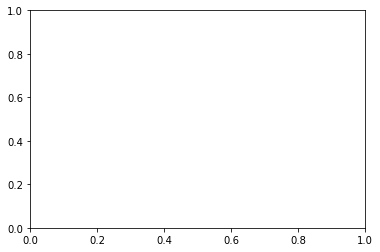

In [51]:
plt.boxplot(df)